## Table of Contents

### 1. Importing libraries and data
### 2. Creating subset 'public'
### 3. Remove outliers from public subset
##### 1. Average cost of attendance
##### 2. Median debt
##### 3. Average family income
##### 4. Admissions rate
##### 5. Average SAT score
##### 6. Size
##### 7. Retention rate
##### 8. Percent of white students
### 4. Exporting public dataset

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Ensure charts are displayed in notebook
%matplotlib inline

In [3]:
# Define path
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [4]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/College Cost Analysis'

In [5]:
# Import data set
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'scorecard_data_cleaned.pkl'))

In [6]:
# Change options to display all columns
pd.options.display.max_columns = None

In [7]:
# Check output
df.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,370.0,457.0,475.0,465.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0,4990.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361,0.0587,1,14444.0,NaN,13893.0,13976.0,15995.0,18957.0,17140.0,NaN,NaN,NaN,NaN,NaN,13913.0,NaN,14684.0,NaN,18281.0,NaN,592.0,NaN,375.0,113.0,61.0,27.0,16.0,NaN,NaN,NaN,NaN,NaN,22489.0,NaN,9744.0,18354.0,NaN,7413.0,5384.0,7101.0,0.7411,0.7067,0.8987,0.6087,NaN,1.0000,NaN,0.7503,0.0758,0.602009,0.098870,0.569140,0.901587,0.365828,0.189893,0.105148,0.062147,0.040804,0.203413,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,0.016422,0.349406,0.634172,0.729127,0.566855,0.457941,0.363151,34779.085684,10340.346032,15500.0,33375.0,10250.0,15500.0,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,1642

In [8]:
# Get shape of dataframe
df.shape

(6806, 260)

In [9]:
# Get info about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6806 entries, 0 to 6805
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 13.5+ MB


# 02. Creating subset 'public'

In [10]:
# Create subset of public institutions
public = df[df['CONTROL'] == 1]

In [11]:
# Check output
public.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,370.0,457.0,475.0,465.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0,4990.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361,0.0587,1,14444.0,NaN,13893.0,13976.0,15995.0,18957.0,17140.0,NaN,NaN,NaN,NaN,NaN,13913.0,NaN,14684.0,NaN,18281.0,NaN,592.0,NaN,375.0,113.0,61.0,27.0,16.0,NaN,NaN,NaN,NaN,NaN,22489.0,NaN,9744.0,18354.0,NaN,7413.0,5384.0,7101.0,0.7411,0.7067,0.8987,0.6087,NaN,1.0000,NaN,0.7503,0.0758,0.602009,0.098870,0.569140,0.901587,0.365828,0.189893,0.105148,0.062147,0.040804,0.203413,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,0.016422,0.349406,0.634172,0.729127,0.566855,0.457941,0.363151,34779.085684,10340.346032,15500.0,33375.0,10250.0,15500.0,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,1642

In [12]:
# Check shape of public
public.shape

(2102, 260)

In [13]:
# Get info about public
public.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2102 entries, 0 to 6805
Columns: 260 entries, UNITID to FEDSCHCD
dtypes: float64(237), int64(14), object(9)
memory usage: 4.2+ MB


In [14]:
# Reset index for public
public = public.reset_index(drop = True)

In [15]:
# Check output
public.head()

,UNITID,OPEID,OPEID6,NAME,CITY,STATE,ZIP,ACCREDAGENCY,SCH_DEG,HCM2,MAIN,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LATITUDE,LONGITUDE,CCBASIC,CCUGPROF,CCSIZSET,HBCU,PBI,ANNHI,TRIBAL,AANAPII,HSI,NANTI,MENONLY,WOMENONLY,RELAFFIL,ADM_RATE,ADM_RATE_ALL,SATVR25,SATVR75,SATMT25,SATMT75,SATWR25,SATWR75,SATVRMID,SATMTMID,SATWRMID,ACTCM25,ACTCM75,ACTEN25,ACTEN75,ACTMT25,ACTMT75,ACTWR25,ACTWR75,ACTCMMID,ACTENMID,ACTMTMID,ACTWRMID,SAT_AVG,SAT_AVG_ALL,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NPT42_PUB,NPT43_PUB,NPT44_PUB,NPT45_PUB,NPT41_PRIV,NPT42_PRIV,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,NPT4_048_PUB,NPT4_048_PRIV,NPT4_3075_PUB,NPT4_3075_PRIV,NPT4_75UP_PUB,NPT4_75UP_PRIV,NUM4_PUB,NUM4_PRIV,NUM41_PUB,NUM42_PUB,NUM43_PUB,NUM44_PUB,NUM45_PUB,NUM41_PRIV,NUM42_PRIV,NUM43_PRIV,NUM44_PRIV,NUM45_PRIV,COSTT4_A,COSTT4_P,TUITIONFEE_IN,TUITIONFEE_OUT,TUITIONFEE_PROG,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,PCTPELL,PFTFTUG1_EF,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV,INC_PCT_LO,DEP_STAT_PCT_IND,DEP_INC_PCT_LO,IND_INC_PCT_LO,PAR_ED_PCT_1STGEN,INC_PCT_M1,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,DEP_INC_PCT_M1,DEP_INC_PCT_M2,DEP_INC_PCT_H1,DEP_INC_PCT_H2,IND_INC_PCT_M1,IND_INC_PCT_M2,IND_INC_PCT_H1,IND_INC_PCT_H2,PAR_ED_PCT_MS,PAR_ED_PCT_HS,PAR_ED_PCT_PS,APPL_SCH_PCT_GE2,APPL_SCH_PCT_GE3,APPL_SCH_PCT_GE4,APPL_SCH_PCT_GE5,DEP_INC_AVG,IND_INC_AVG,DEBT_MDN,GRAD_DEBT_MDN,WDRAW_DEBT_MDN,LO_INC_DEBT_MDN,MD_INC_DEBT_MDN,HI_INC_DEBT_MDN,DEP_DEBT_MDN,IND_DEBT_MDN,PELL_DEBT_MDN,NOPELL_DEBT_MDN,FEMALE_DEBT_MDN,MALE_DEBT_MDN,FIRSTGEN_DEBT_MDN,NOTFIRSTGEN_DEBT_MDN,DEBT_N,GRAD_DEBT_N,WDRAW_DEBT_N,LO_INC_DEBT_N,MD_INC_DEBT_N,HI_INC_DEBT_N,DEP_DEBT_N,IND_DEBT_N,PELL_DEBT_N,NOPELL_DEBT_N,FEMALE_DEBT_N,MALE_DEBT_N,FIRSTGEN_DEBT_N,NOTFIRSTGEN_DEBT_N,GRAD_DEBT_MDN10YR,CUML_DEBT_N,CUML_DEBT_P90,CUML_DEBT_P75,CUML_DEBT_P25,CUML_DEBT_P10,INC_N,DEP_INC_N,IND_INC_N,DEP_STAT_N,PAR_ED_N,APPL_SCH_N,LOAN_EVER,PELL_EVER,AGE_ENTRY,AGEGE24,FEMALE,MARRIED,DEPENDENT,VETERAN,FIRST_GEN,FAMINC,MD_FAMINC,FAMINC_IND,PCT_WHITE,PCT_BLACK,PCT_ASIAN,PCT_HISPANIC,PCT_BA,PCT_GRAD_PROF,PCT_BORN_US,MEDIAN_HH_INC,POVERTY_RATE,UNEMP_RATE,LN_MEDIAN_HH_INC,DEBT_MDN_SUPP,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,ALIAS,ICLEVEL,UGDS_MEN,UGDS_WOMEN,T4APPROVALDATE,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE,RET_FT4_POOLED,RET_FTL4_POOLED,RET_PT4_POOLED,RET_PTL4_POOLED,RET_FT_DEN4_POOLED,RET_FT_DENL4_POOLED,RET_PT_DEN4_POOLED,RET_PT_DENL4_POOLED,POOLYRSRET_FT,POOLYRSRET_PT,RET_FT4_POOLED_SUPP,RET_FTL4_POOLED_SUPP,RET_PT4_POOLED_SUPP,RET_PTL4_POOLED_SUPP,SCHTYPE,OPEFLAG,CIPTFBS1,CIPTFBS2,CIPTFBS3,CIPTFBS4,CIPTFBS5,CIPTFBS6,CIPTFBSANNUAL1,CIPTFBSANNUAL2,CIPTFBSANNUAL3,CIPTFBSANNUAL4,CIPTFBSANNUAL5,CIPTFBSANNUAL6,FTFTPCTPELL,FTFTPCTFLOAN,UG12MN,G12MN,SCUGFFN,POOLYRS_FTFTAIDPCT,FTFTPCTPELL_POOLED_SUPP,FTFTPCTFLOAN_POOLED_SUPP,SCUGFFN_POOLED,LPSTAFFORD_CNT,LPSTAFFORD_AMT,FEDSCHCD
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,3.0,0,1,1,3,4,1,1,5,12.0,34.783368,-86.568502,18.0,10.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.8986,0.8986,430.0,520.0,420.0,510.0,370.0,457.0,475.0,465.0,414.0,16.0,19.0,14.0,20.0,15.0,18.0,NaN,NaN,18.0,17.0,17.0,NaN,957.0,957.0,0.0,4990.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,0.0118,0.0070,0.0361,0.0587,1,14444.0,NaN,13893.0,13976.0,15995.0,18957.0,17140.0,NaN,NaN,NaN,NaN,NaN,13913.0,NaN,14684.0,NaN,18281.0,NaN,592.0,NaN,375.0,113.0,61.0,27.0,16.0,NaN,NaN,NaN,NaN,NaN,22489.0,NaN,9744.0,18354.0,NaN,7413.0,5384.0,7101.0,0.7411,0.7067,0.8987,0.6087,NaN,1.0000,NaN,0.7503,0.0758,0.602009,0.098870,0.569140,0.901587,0.365828,0.189893,0.105148,0.062147,0.040804,0.203413,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,0.016422,0.349406,0.634172,0.729127,0.566855,0.457941,0.363151,34779.085684,10340.346032,15500.0,33375.0,10250.0,15500.0,16000.0,14518.0,15000.0,19000.0,17500.0,10250.0,17500.0,14250.0,15000.0,1642

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='COSTT4_A', ylabel='Density'>

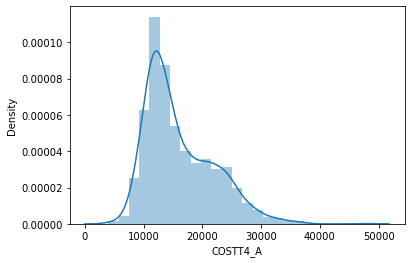

In [16]:
# Get histogram of average cost of attendance
sns.distplot(public['COSTT4_A'], bins = 25)

In [17]:
# Create lower cost category
public.loc[public['COSTT4_A'] < 10000, 'COST_CATEGORY'] = 'Lower cost'

In [18]:
# Create middle cost category
public.loc[(public['COSTT4_A'] >= 10000) & (public['COSTT4_A'] < 20000), 'COST_CATEGORY'] = 'Middle cost'

In [19]:
# Create higher cost category
public.loc[public['COSTT4_A'] >= 20000, 'COST_CATEGORY'] = 'Higher cost'

In [20]:
# Get value counts of cost category
public['COST_CATEGORY'].value_counts(dropna = False)

Middle cost    1067
NaN             488
Higher cost     403
Lower cost      144
Name: COST_CATEGORY, dtype: int64

In [21]:
# Keep specific columns for subset of public institutions
public = public[['UNITID', 'NAME', 'CITY', 'STATE', 'ZIP', 'REGION', 'LOCALE', 'COSTT4_A', 'DEBT_MDN', 'FAMINC', 'ADM_RATE', 'SAT_AVG', 'UGDS', 'RET_FT4_POOLED', 'UGDS_WHITE', 'COST_CATEGORY']]

In [22]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [23]:
# Check shape
public.shape

(2102, 16)

In [24]:
# Get info
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          2102 non-null   int64  
 1   NAME            2102 non-null   object 
 2   CITY            2102 non-null   object 
 3   STATE           2102 non-null   object 
 4   ZIP             2102 non-null   object 
 5   REGION          2102 non-null   int64  
 6   LOCALE          1983 non-null   float64
 7   COSTT4_A        1614 non-null   float64
 8   DEBT_MDN        1766 non-null   float64
 9   FAMINC          2026 non-null   float64
 10  ADM_RATE        626 non-null    float64
 11  SAT_AVG         509 non-null    float64
 12  UGDS            1962 non-null   float64
 13  RET_FT4_POOLED  645 non-null    float64
 14  UGDS_WHITE      1962 non-null   float64
 15  COST_CATEGORY   1614 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory usage: 262.9+ KB


# 03. Remove outliers from public subset

## 01. Average cost of attendance

In [25]:
# Get number of missing values for average cost of attendance
public['COSTT4_A'].isnull().sum()

488

In [26]:
# Change options to display all rows
pd.options.display.max_rows = None

In [27]:
# Look at public institutions with missing values for cost
public[public['COSTT4_A'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
6,100812,Athens State University,Athens,AL,35611,5,31.0,NaN,13750.0,38479.387370,NaN,NaN,2732.0,NaN,0.7657,NaN
40,102711,Alaska Vocational Technical Center,Seward,AK,99664-0889,8,43.0,NaN,5500.0,36850.449438,NaN,NaN,855.0,NaN,0.4924,NaN
61,106263,University of Arkansas for Medical Sciences,Little Rock,AR,72205-7199,5,12.0,NaN,14000.0,42150.527500,NaN,NaN,601.0,NaN,0.7072,NaN
100,110398,University of California-Hastings College of Law,San Francisco,CA,94102-4978,8,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,110699,University of California-San Francisco,San Francisco,CA,94143-0244,8,11.0,NaN,NaN,14932.768116,NaN,NaN,NaN,NaN,NaN,NaN
133,112367,Clovis Adult Education,Clovis,CA,93611,8,21.0,NaN,NaN,19102.390244,NaN,NaN,752.0,NaN,0.1795,NaN
172,117803,Los Angeles County College of Nursing and Alli...,Los Angeles,CA,90033-1084,8,11.0,NaN,12218.0,29261.807407,NaN,NaN,212.0,NaN,0.1887,NaN
187,119678,Naval Postgraduate School,Monterey,CA,93943,0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,123493,Charles A Jones Career and Education Center,Sacramento,CA,95824-1529,8,11.0,NaN,5498.0,24473.039501,NaN,NaN,281.0,NaN,0.2456,NaN
242,126915,Technical College of the Rockies,Delta,CO,81416,7,41.0,NaN,5500.0,37587.698980,NaN,NaN,182.0,NaN,0.7033,NaN


The vast majority of schools with missing cost information are technical schools, vocational schools, career centers, and military colleges, all of which have much lower average costs than regular public institutions. So even though this makes up about 23% of the data set, I'm going to remove them. If instead I imputed the median, I would be giving these schools a much higher average cost than they should have. The remaining schools with missing values that aren't in the above categories (technical, etc.), likely make up around 5% of the data set.

In [28]:
# Remove rows with missing values for average cost from data set
public = public[public['COSTT4_A'].isnull() == False]

In [29]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [30]:
# Check new shape
public.shape

(1614, 16)

<AxesSubplot:xlabel='COSTT4_A'>

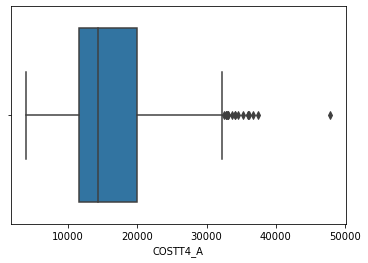

In [31]:
# Look at box plot for average cost of attendance
sns.boxplot(x = public['COSTT4_A'])

In [32]:
# Find Q1
Q1 = public['COSTT4_A'].quantile(0.25)

In [33]:
# Check output
Q1

11699.25

In [34]:
# Find Q3
Q3 = public['COSTT4_A'].quantile(0.75)

In [35]:
# Check output
Q3

19932.5

In [36]:
# Find IQR
IQR = Q3 - Q1

In [37]:
# Check output
IQR

8233.25

In [38]:
# Find value of lower limit for outliers
Q3 + 1.5 * IQR

32282.375

In [39]:
# Create subset of outliers
cost_outliers = public[public['COSTT4_A'] >= (Q3 + 1.5 * IQR)]

In [40]:
# Check output
cost_outliers

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
115,110635,University of California-Berkeley,Berkeley,CA,94720,8,12.0,36739.0,12387.0,54799.682386,0.1484,1448.0,30845.0,0.9705,0.2487,Higher cost
116,110644,University of California-Davis,Davis,CA,95616-8678,8,23.0,35252.0,11334.0,51677.668534,0.4107,1292.0,30698.0,0.9242,0.2376,Higher cost
117,110653,University of California-Irvine,Irvine,CA,92697,8,11.0,32985.0,14429.0,48922.474589,0.2876,1316.0,29722.0,0.9350,0.1341,Higher cost
118,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,8,11.0,33654.0,14000.0,54617.435749,0.1404,1423.0,31568.0,0.9681,0.2660,Higher cost
119,110671,University of California-Riverside,Riverside,CA,92521,8,11.0,32843.0,15489.0,48858.908770,0.5057,1229.0,20574.0,0.8904,0.1142,Higher cost
122,110705,University of California-Santa Barbara,Santa Barbara,CA,93106,8,22.0,35987.0,13000.0,56328.700609,0.3220,1360.0,23063.0,0.9250,0.3066,Higher cost
123,110714,University of California-Santa Cruz,Santa Cruz,CA,95064-1011,8,13.0,35982.0,15000.0,61406.143234,0.4737,1311.0,17792.0,0.8921,0.3035,Higher cost
239,126775,Colorado School of Mines,Golden,CO,80401,7,21.0,33038.0,21000.0,107141.616510,0.4919,1383.0,4906.0,0.9241,0.7222,Higher cost
837,183044,University of New Hampshire-Main Campus,Durham,NH,03824-3547,1,23.0,32469.0,23136.0,101251.052430,0.7678,1186.0,12668.0,0.8603,0.8243,Higher cost
877,187134,The College of New Jersey,Ewing,NJ,08628-7718,2,21.0,34074.0,20934.0,113503.891780,0.4980,1265.0,6886.0,0.9346,0.6428,Higher cost


In [41]:
# Get shape
cost_outliers.shape

(17, 16)

In [42]:
# Get descriptive info for cost
public['COSTT4_A'].describe()

count     1614.000000
mean     16070.578686
std       5799.496042
min       3990.000000
25%      11699.250000
50%      14312.500000
75%      19932.500000
max      47826.000000
Name: COSTT4_A, dtype: float64

When looking at the boxplot above, all of the outliers except one are right above the 3rd quartile. The standard deviation is approximately 5800, so there is only one observation that is more than 3 standard deviations away from the median (37,331): the Carolinas College of Health Sciences at 47,826. I will only remove that observation.

In [43]:
# Remove school with cost over 3 st. dev. from public dataframe
public = public[public['COSTT4_A'] < 40000]

In [44]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [45]:
# Check new shape
public.shape

(1613, 16)

## 02. Median debt

In [46]:
# Get number of missing values for median debt
public['DEBT_MDN'].isnull().sum()

139

In [47]:
# Look at public institutions with missing values for median debt
public[public['DEBT_MDN'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
12,101240,Gadsden State Community College,Gadsden,AL,35903,5,13.0,10098.0,NaN,19449.725019,NaN,NaN,4147.0,NaN,0.7056,Middle cost
13,101286,George C Wallace Community College-Dothan,Dothan,AL,36303-9234,5,13.0,9564.0,NaN,19125.651634,NaN,NaN,3746.0,NaN,0.6188,Lower cost
15,101301,George C Wallace State Community College-Selma,Selma,AL,36703-2808,5,32.0,13788.0,NaN,15431.714286,NaN,NaN,1104.0,NaN,0.2065,Middle cost
16,101462,J. F. Drake State Community and Technical College,Huntsville,AL,35811,5,12.0,11123.0,NaN,16557.179487,NaN,NaN,678.0,NaN,0.3451,Middle cost
17,101471,J F Ingram State Technical College,Deatsville,AL,36022,5,21.0,5580.0,NaN,321.385321,NaN,NaN,443.0,NaN,0.4312,Lower cost
21,101569,Lawson State Community College,Birmingham,AL,35221-1717,5,12.0,13735.0,NaN,18229.648074,NaN,NaN,2959.0,NaN,0.1490,Middle cost
23,101602,Lurleen B Wallace Community College,Andalusia,AL,36420-1418,5,41.0,14136.0,NaN,20928.068966,NaN,NaN,1267.0,NaN,0.6851,Middle cost
29,101994,Reid State Technical College,Evergreen,AL,36401,5,41.0,8958.0,NaN,16019.329700,NaN,NaN,261.0,NaN,0.3985,Lower cost
30,102030,Bishop State Community College,Mobile,AL,36603-5898,5,12.0,10155.0,NaN,16541.265770,NaN,NaN,2440.0,NaN,0.2418,Middle cost
31,102067,Shelton State Community College,Tuscaloosa,AL,35405-8522,5,12.0,12070.0,NaN,19222.902755,NaN,NaN,3829.0,NaN,0.5503,Middle cost


Again, most of the schools with missing values here are either technical schools or community colleges. These schools tend to have much lower costs than most public institutions, and thus would have lower median debt than most public institutions. Most of them also seem to be missing other info, like admissions rate, SAT average, and retention rate (which makes sense, since technical schools and community colleges operate differently: anyone can take classes, and the aim is usually to transfer to another institution after 4 years). I think it makes more sense to remove them than to impute the median.

In [48]:
# Remove rows with missing values for median debt from data set
public = public[public['DEBT_MDN'].isnull() == False]

In [49]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [50]:
# Get new shape
public.shape

(1474, 16)

<AxesSubplot:xlabel='DEBT_MDN'>

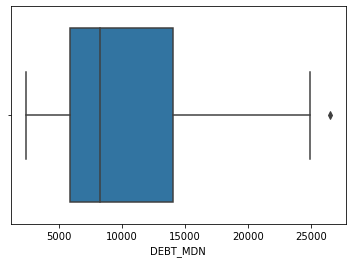

In [51]:
# Look at box plot for median debt
sns.boxplot(x = public['DEBT_MDN'])

In [52]:
# Look at probable outlier
public[public['DEBT_MDN'] > 25000]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
586,161299,Maine Maritime Academy,Castine,ME,04420-0001,1,42.0,26962.0,26545.0,95450.459519,0.5502,1104.0,979.0,0.8016,0.855,Higher cost


In [53]:
# Get descriptive stats
public['DEBT_MDN'].describe()

count     1474.000000
mean      9942.314790
std       4775.351788
min       2334.000000
25%       5808.750000
50%       8250.000000
75%      14000.000000
max      26545.000000
Name: DEBT_MDN, dtype: float64

In [54]:
# Set Q1
Q1 = public['DEBT_MDN'].quantile(0.25)

In [55]:
# Set Q3
Q3 = public['DEBT_MDN'].quantile(0.75)

In [56]:
# Get IQR
IQR = Q3 - Q1

In [57]:
# Find lower limit for high outliers
Q3 + 1.5 * IQR

26286.875

So the Maine Maritime Academy just makes it into outlier territory using both the IQR and 3 st. dev. methods.

In [58]:
# Remove outlier observation
public = public[public['DEBT_MDN'] < 26000]

In [59]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [60]:
# Check new shape
public.shape

(1473, 16)

## 03. Average family income

In [61]:
# Get number of missing values for average family income
public['FAMINC'].isnull().sum()

4

In [62]:
# Look at rows with missing average family income
public[public['FAMINC'].isnull()]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1925,463056,University of Connecticut-Hartford Campus,Hartford,CT,06103,1,12.0,16600.0,19500.0,NaN,0.9486,1119.0,1396.0,0.8318,0.4255,Middle cost
1940,482936,Florida Polytechnic University,Lakeland,FL,33805-8531,5,41.0,20689.0,5500.0,NaN,0.5066,1312.0,1389.0,0.7464,0.6407,Higher cost
1964,488730,Northeast Lakeview College,Universal City,TX,78145,6,21.0,10145.0,3860.0,NaN,NaN,NaN,4587.0,NaN,0.3124,Middle cost
1974,490805,Purdue University Northwest,Hammond,IN,46323,3,21.0,16949.0,14758.0,NaN,0.3108,1022.0,8244.0,0.6878,0.5986,Middle cost


In [63]:
# Get median for average family income
public['FAMINC'].median()

37662.392413

In [64]:
# Impute median for rows with missing average family income
public['FAMINC'].fillna(37662.39, inplace = True)

In [65]:
# Check no missing values left
public['FAMINC'].isnull().sum()

0

<AxesSubplot:xlabel='FAMINC'>

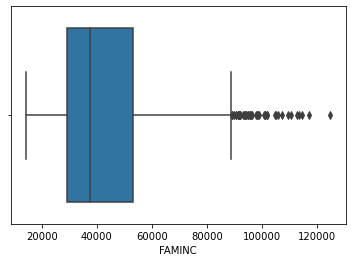

In [66]:
# Get boxplot of average family income
sns.boxplot(x = public['FAMINC'])

In [67]:
# Get descriptive stats for average family income
public['FAMINC'].describe()

count      1473.000000
mean      43402.473173
std       19782.335572
min       14198.415094
25%       29084.492830
50%       37662.390000
75%       53059.158444
max      124857.922320
Name: FAMINC, dtype: float64

In [68]:
# Get value for 3 st. dev. above median
sdthree = (public['FAMINC'].median()) + (public['FAMINC'].std() * 3)

In [69]:
# Look at value
sdthree

97009.39671513799

In [70]:
# Return schools with family income over sdthree
public[public['FAMINC'] >= sdthree]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
236,126614,University of Colorado Boulder,Boulder,CO,80309-0017,7,12.0,30178.0,13000.0,98821.997650,0.8154,1281.0,29753.0,0.8705,0.6745,Higher cost
239,126775,Colorado School of Mines,Golden,CO,80401,7,21.0,33038.0,21000.0,107141.616510,0.4919,1383.0,4906.0,0.9241,0.7222,Higher cost
283,130943,University of Delaware,Newark,DE,19716,2,21.0,25584.0,21000.0,124857.922320,0.6639,1267.0,19060.0,0.9068,0.7081,Higher cost
468,151351,Indiana University-Bloomington,Bloomington,IN,47405-7000,3,13.0,24326.0,15940.0,98551.582776,0.7691,1275.0,32991.0,0.9112,0.6908,Higher cost
637,166692,Massachusetts Maritime Academy,Buzzards Bay,MA,02532-1803,1,22.0,25659.0,22763.0,117176.800000,0.8905,1127.0,1653.0,0.8680,0.8724,Higher cost
837,183044,University of New Hampshire-Main Campus,Durham,NH,03824-3547,1,23.0,32469.0,23136.0,101251.052430,0.7678,1186.0,12668.0,0.8603,0.8243,Higher cost
839,183071,University of New Hampshire at Manchester,Manchester,NH,03101-1113,1,12.0,20689.0,23136.0,101251.052430,0.6757,1114.0,703.0,0.7890,0.7098,Higher cost
877,187134,The College of New Jersey,Ewing,NJ,08628-7718,2,21.0,34074.0,20934.0,113503.891780,0.4980,1265.0,6886.0,0.9346,0.6428,Higher cost
980,196291,SUNY Maritime College,Throggs Neck,NY,10465-4198,2,11.0,25308.0,20346.0,98243.873874,0.7166,1176.0,1581.0,0.8551,0.6875,Higher cost
1121,204006,Miami University-Hamilton,Hamilton,OH,45011,3,21.0,13327.0,16100.0,101679.535760,NaN,NaN,2452.0,0.6791,0.7643,Middle cost


Even though there are 21 observations that count as outliers, there are some pretty important schools here, so I will only remove the most egregious ones: over $115,000 average family income.

In [71]:
# Remove egregious outliers
public = public[public['FAMINC'] < 115000]

In [72]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [73]:
# Check new shape
public.shape

(1471, 16)

## 04. Admissions rate

In [74]:
# Get number of missing values for admissions rate
public['ADM_RATE'].isnull().sum()

916

That is about 62% of the data set. I will ignore them for now.

<AxesSubplot:xlabel='ADM_RATE'>

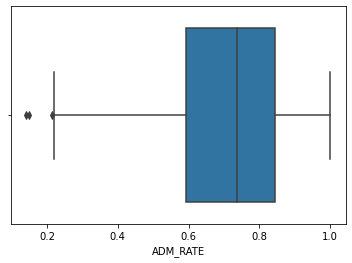

In [75]:
# Get boxplot of admissions rate
sns.boxplot(x = public['ADM_RATE'])

In [76]:
# Get descriptive stats
public['ADM_RATE'].describe()

count    555.000000
mean       0.704872
std        0.178251
min        0.140400
25%        0.592800
50%        0.736900
75%        0.842700
max        1.000000
Name: ADM_RATE, dtype: float64

In [77]:
# Get IQR
IQR = public['ADM_RATE'].quantile(0.75) - public['ADM_RATE'].quantile(0.25)

In [78]:
# Get list of outliers
public[public['ADM_RATE'] <= (0.5928 - (1.5 * IQR))]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
115,110635,University of California-Berkeley,Berkeley,CA,94720,8,12.0,36739.0,12387.0,54799.682386,0.1484,1448.0,30845.0,0.9705,0.2487,Higher cost
118,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,8,11.0,33654.0,14000.0,54617.435749,0.1404,1423.0,31568.0,0.9681,0.2660,Higher cost
370,139755,Georgia Institute of Technology-Main Campus,Atlanta,GA,30332-0530,5,11.0,28501.0,20735.0,94825.188719,0.2153,1465.0,15201.0,0.9713,0.4804,Higher cost


In [79]:
# Get list of outliers using 3 standard deviations below median
public[public['ADM_RATE'] < (public['ADM_RATE'].median() - public['ADM_RATE'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
115,110635,University of California-Berkeley,Berkeley,CA,94720,8,12.0,36739.0,12387.0,54799.682386,0.1484,1448.0,30845.0,0.9705,0.2487,Higher cost
118,110662,University of California-Los Angeles,Los Angeles,CA,90095-1405,8,11.0,33654.0,14000.0,54617.435749,0.1404,1423.0,31568.0,0.9681,0.2660,Higher cost


In [80]:
# Remove two outliers
public = public[(public['ADM_RATE'] >= (public['ADM_RATE'].median() - public['ADM_RATE'].std()*3)) | (public['ADM_RATE'].isnull())]

In [81]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [82]:
# Get new shape
public.shape

(1469, 16)

## 05. Average SAT score

In [83]:
# Get number of missing values for average SAT score
public['SAT_AVG'].isnull().sum()

971

That is about 66% of the data set. I will ignore them for now.

<AxesSubplot:xlabel='SAT_AVG'>

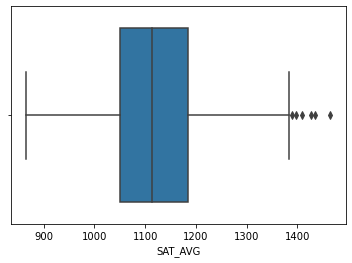

In [84]:
# Get boxplot of average SAT score
sns.boxplot(x = public['SAT_AVG'])

In [85]:
# Get descriptive stats
public['SAT_AVG'].describe()

count     498.000000
mean     1124.564257
std       104.305931
min       865.000000
25%      1050.000000
50%      1114.500000
75%      1185.000000
max      1465.000000
Name: SAT_AVG, dtype: float64

In [86]:
# Get IQR
IQR = public['SAT_AVG'].quantile(0.75) - public['SAT_AVG'].quantile(0.25)

In [87]:
# Get list of outliers
public[public['SAT_AVG'] >= (public['SAT_AVG'].quantile(0.75) + (1.5 * IQR))]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
370,139755,Georgia Institute of Technology-Main Campus,Atlanta,GA,30332-0530,5,11.0,28501.0,20735.0,94825.188719,0.2153,1465.0,15201.0,0.9713,0.4804,Higher cost
611,163286,University of Maryland-College Park,College Park,MD,20742,2,21.0,25919.0,16750.0,91754.205838,0.4716,1390.0,30184.0,0.9538,0.4965,Higher cost
674,170976,University of Michigan-Ann Arbor,Ann Arbor,MI,48109,3,12.0,29407.0,15750.0,93277.933271,0.2283,1434.0,30079.0,0.9720,0.5853,Higher cost
1028,199120,University of North Carolina at Chapel Hill,Chapel Hill,NC,27599,5,13.0,25527.0,14024.0,81233.056818,0.2271,1398.0,18946.0,0.9685,0.6017,Higher cost
1476,231624,William & Mary,Williamsburg,VA,23187-8795,5,23.0,37386.0,16750.0,114454.088410,0.3692,1410.0,6349.0,0.9505,0.5910,Higher cost
1512,234076,University of Virginia-Main Campus,Charlottesville,VA,22903-2628,5,23.0,32213.0,15750.0,100900.168510,0.2643,1427.0,16405.0,0.9672,0.5710,Higher cost


In [88]:
# Get list of outliers using 3 standard deviations above median
public[public['SAT_AVG'] > (public['SAT_AVG'].median() + public['SAT_AVG'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
370,139755,Georgia Institute of Technology-Main Campus,Atlanta,GA,30332-0530,5,11.0,28501.0,20735.0,94825.188719,0.2153,1465.0,15201.0,0.9713,0.4804,Higher cost
674,170976,University of Michigan-Ann Arbor,Ann Arbor,MI,48109,3,12.0,29407.0,15750.0,93277.933271,0.2283,1434.0,30079.0,0.9720,0.5853,Higher cost


In [89]:
# Remove two outliers
public = public[(public['SAT_AVG'] <= (public['SAT_AVG'].median() + public['SAT_AVG'].std()*3)) | (public['SAT_AVG'].isnull())]

In [90]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [91]:
# Check new shape
public.shape

(1467, 16)

## 06. Size

In [92]:
# Get number of missing values for size
public['UGDS'].isnull().sum()

0

<AxesSubplot:xlabel='UGDS'>

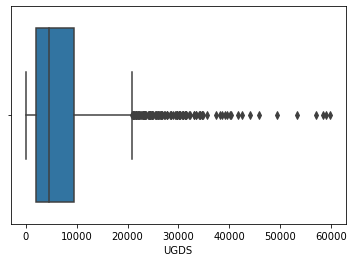

In [93]:
# Get boxplot of size
sns.boxplot(x = public['UGDS'])

In [94]:
# Get descriptive stats
public['UGDS'].describe()

count     1467.000000
mean      7429.137014
std       8300.503711
min         30.000000
25%       1945.000000
50%       4569.000000
75%       9509.000000
max      59821.000000
Name: UGDS, dtype: float64

In [95]:
# Get number of schools above 3 st. dev.
(public['UGDS'] >= (public['UGDS'].median() + public['UGDS'].std() * 3)).sum()

49

That is a lot of observations, so let's check 4 standard deviations.

In [96]:
# Get number of schools above 4 st. dev.
(public['UGDS'] >= (public['UGDS'].median() + public['UGDS'].std() * 4)).sum()

16

In [97]:
# Show which schools are 4 st. dev. away
public[public['UGDS'] >= (public['UGDS'].median() + public['UGDS'].std() * 4)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
41,104151,Arizona State University-Tempe,Tempe,AZ,85287,6,12.0,25621.0,14000.0,56365.776329,0.8478,1240.0,42529.0,0.8711,0.5008,Higher cost
290,132903,University of Central Florida,Orlando,FL,32816,5,21.0,21034.0,15000.0,47674.167478,0.4253,1261.0,58392.0,0.8999,0.4757,Higher cost
299,133951,Florida International University,Miami,FL,33199,5,21.0,19434.0,14812.0,34024.028604,0.5856,1185.0,41777.0,0.8921,0.0865,Middle cost
318,135717,Miami Dade College,Miami,FL,33132-2204,5,11.0,12378.0,8000.0,22429.165050,NaN,NaN,49443.0,NaN,0.0540,Middle cost
346,138187,Valencia College,Orlando,FL,32835,5,11.0,10688.0,5750.0,30746.683603,NaN,NaN,38107.0,NaN,0.2566,Middle cost
461,150987,Ivy Tech Community College,Indianapolis,IN,46208-5752,3,11.0,11812.0,5934.0,31666.246617,NaN,NaN,59821.0,NaN,0.7094,Middle cost
608,163204,University of Maryland Global Campus,Adelphi,MD,20783-8010,2,21.0,17822.0,11227.0,37491.958228,NaN,NaN,44071.0,0.4427,0.3800,Middle cost
675,171100,Michigan State University,East Lansing,MI,48824-1046,3,13.0,28194.0,20500.0,89132.747077,0.7768,1224.0,39208.0,0.9148,0.6805,Higher cost
1135,204796,Ohio State University-Main Campus,Columbus,OH,43210,3,11.0,26555.0,15000.0,80387.102264,0.5197,1359.0,45769.0,0.9436,0.6684,Higher cost
1248,214777,Pennsylvania State University-Main Campus,University Park,PA,16802-1503,2,13.0,36048.0,19500.0,82495.088728,0.5649,1269.0,40108.0,0.9306,0.6567,Higher cost


In [98]:
# Remove these outliers
public = public[(public['UGDS'] <= (public['UGDS'].median() + public['UGDS'].std()*4)) | (public['UGDS'].isnull())]

In [99]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [100]:
# Check new shape
public.shape

(1451, 16)

## 07. Retention rate

In [101]:
# Get number of missing values for retention rate
public['RET_FT4_POOLED'].isnull().sum()

843

That's about 58% of the data set, so I will ignore them for now.

<AxesSubplot:xlabel='RET_FT4_POOLED'>

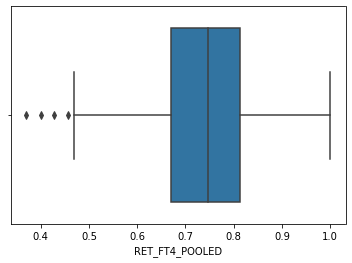

In [102]:
# Get boxplot of retention rate
sns.boxplot(x = public['RET_FT4_POOLED'])

In [103]:
# Get descriptive stats
public['RET_FT4_POOLED'].describe()

count    608.000000
mean       0.739796
std        0.107451
min        0.369600
25%        0.671025
50%        0.746350
75%        0.812750
max        1.000000
Name: RET_FT4_POOLED, dtype: float64

In [104]:
# Get IQR
IQR = public['RET_FT4_POOLED'].quantile(0.75) - public['RET_FT4_POOLED'].quantile(0.25)

In [105]:
# Get list of outliers
public[public['RET_FT4_POOLED'] < (public['RET_FT4_POOLED'].quantile(0.25) - 1.5*IQR)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
848,183257,Granite State College,Concord,NH,03301-3471,1,31.0,16970.0,8985.0,45400.597514,NaN,NaN,1628.0,0.3696,0.8292,Middle cost
1215,211608,Cheyney University of Pennsylvania,Cheyney,PA,19319-0200,2,21.0,24594.0,12750.0,33413.053763,NaN,NaN,466.0,0.4565,0.0129,Higher cost
1566,237701,Potomac State College of West Virginia University,Keyser,WV,26726,5,32.0,14254.0,14768.0,76249.316487,NaN,NaN,1099.0,0.4282,0.8089,Middle cost
1663,260901,Purdue University Global-Davenport,Davenport,IA,52807-2095,4,12.0,21413.0,11875.0,25167.426845,NaN,NaN,23042.0,0.4000,0.5190,Higher cost


In [106]:
# Get outliers more than 3 st. dev. away
public[public['RET_FT4_POOLED'] < (public['RET_FT4_POOLED'].median() - public['RET_FT4_POOLED'].std()*3)]

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
848,183257,Granite State College,Concord,NH,03301-3471,1,31.0,16970.0,8985.0,45400.597514,NaN,NaN,1628.0,0.3696,0.8292,Middle cost
1663,260901,Purdue University Global-Davenport,Davenport,IA,52807-2095,4,12.0,21413.0,11875.0,25167.426845,NaN,NaN,23042.0,0.4000,0.5190,Higher cost


In [107]:
# Remove two outliers
public = public[(public['RET_FT4_POOLED'] >= (public['RET_FT4_POOLED'].median() - public['RET_FT4_POOLED'].std()*3)) | (public['RET_FT4_POOLED'].isnull())]

In [108]:
# Check output
public.head()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
0,100654,Alabama A & M University,Normal,AL,35762,5,12.0,22489.0,15500.0,32362.826114,0.8986,957.0,4990.0,0.5978,0.0186,Higher cost
1,100663,University of Alabama at Birmingham,Birmingham,AL,35294-0110,5,12.0,24347.0,15000.0,51306.674306,0.9211,1220.0,13186.0,0.8303,0.5717,Higher cost
2,100706,University of Alabama in Huntsville,Huntsville,AL,35899,5,12.0,23441.0,14476.0,61096.588949,0.8087,1314.0,7458.0,0.8269,0.7167,Higher cost
3,100724,Alabama State University,Montgomery,AL,36104-0271,5,12.0,21476.0,18679.0,31684.382188,0.9774,972.0,3903.0,0.5898,0.0167,Higher cost
4,100751,The University of Alabama,Tuscaloosa,AL,35487-0100,5,12.0,29424.0,17500.0,91846.749624,0.5906,1252.0,32177.0,0.8748,0.7774,Higher cost


In [109]:
# Check new shape
public.shape

(1449, 16)

## 08. Percent of white students

In [110]:
# Find number of missing values for percent of white students
public['UGDS_WHITE'].isnull().sum()

0

<AxesSubplot:xlabel='UGDS_WHITE'>

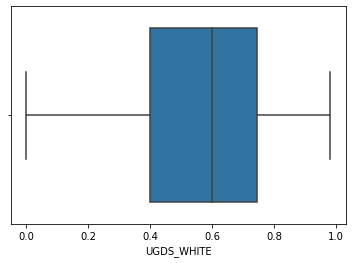

In [111]:
# Get boxplot
sns.boxplot(x = public['UGDS_WHITE'])

# 04. Exporting public dataset

In [112]:
# Reset index for public
public = public.reset_index(drop = True)

In [113]:
# Check output
public.tail()

,UNITID,NAME,CITY,STATE,ZIP,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE,COST_CATEGORY
1444,486840,Kennesaw State University,Kennesaw,GA,30144,5,21.0,23824.0,15285.0,62194.428750,0.5794,1173.0,31511.0,0.7841,0.5495,Higher cost
1445,487320,Texas State Technical College,Waco,TX,76705,6,12.0,13621.0,6334.0,32867.559834,NaN,NaN,9061.0,NaN,0.3728,Middle cost
1446,488730,Northeast Lakeview College,Universal City,TX,78145,6,21.0,10145.0,3860.0,37662.390000,NaN,NaN,4587.0,NaN,0.3124,Middle cost
1447,489201,Clovis Community College,Fresno,CA,93730,8,11.0,8982.0,3500.0,25004.783677,NaN,NaN,6678.0,NaN,0.3637,Lower cost
1448,490805,Purdue University Northwest,Hammond,IN,46323,3,21.0,16949.0,14758.0,37662.390000,0.3108,1022.0,8244.0,0.6878,0.5986,Middle cost


In [114]:
# Get final shape
public.shape

(1449, 16)

In [115]:
# Get final info
public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UNITID          1449 non-null   int64  
 1   NAME            1449 non-null   object 
 2   CITY            1449 non-null   object 
 3   STATE           1449 non-null   object 
 4   ZIP             1449 non-null   object 
 5   REGION          1449 non-null   int64  
 6   LOCALE          1449 non-null   float64
 7   COSTT4_A        1449 non-null   float64
 8   DEBT_MDN        1449 non-null   float64
 9   FAMINC          1449 non-null   float64
 10  ADM_RATE        543 non-null    float64
 11  SAT_AVG         488 non-null    float64
 12  UGDS            1449 non-null   float64
 13  RET_FT4_POOLED  606 non-null    float64
 14  UGDS_WHITE      1449 non-null   float64
 15  COST_CATEGORY   1449 non-null   object 
dtypes: float64(9), int64(2), object(5)
memory usage: 181.2+ KB


In [116]:
# Get final descriptive stats
public.describe()

,UNITID,REGION,LOCALE,COSTT4_A,DEBT_MDN,FAMINC,ADM_RATE,SAT_AVG,UGDS,RET_FT4_POOLED,UGDS_WHITE
count,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,1449.000000,543.000000,488.00000,1449.000000,606.000000,1449.000000
mean,195311.890269,4.680469,23.436853,16340.716356,9877.195307,43153.010553,0.710295,1120.77459,6988.855072,0.740967,0.552468
std,74891.319521,2.109413,10.839884,5666.079043,4728.126642,19472.141002,0.172973,101.13109,7186.649911,0.105665,0.242160
min,100654.000000,0.000000,11.000000,6419.000000,2334.000000,14198.415094,0.219000,865.00000,30.000000,0.428200,0.000000
25%,149772.000000,3.000000,13.000000,11870.000000,5750.000000,29068.478411,0.601800,1050.00000,1930.000000,0.671825,0.399700
50%,186034.000000,5.000000,21.000000,14631.000000,8250.000000,37626.937421,0.740300,1111.00000,4495.000000,0.746800,0.598600
75%,219189.000000,6.000000,33.000000,20429.000000,13875.000000,52838.039301,0.843450,1179.00000,9272.000000,0.812850,0.746500
max,490805.000000,9.000000,43.000000,37386.000000,24969.000000,114454.088410,1.000000,1427.00000,37291.000000,1.000000,0.981400


In [117]:
# Export public dataset
public.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'public_data.pkl'))